In [ ]:
import os
import re
import pandas as pd
import numpy as np

from datetime import timedelta, datetime
from pathlib import Path
import wrds
import matplotlib.pyplot as plt

In [ ]:
lm_weight = pd.read_csv('reset_lm_term_weight_results.csv')
hvd_weight = pd.read_csv('harvard_term_weight_results_new.csv')
rtn = pd.read_csv('excess_returns_1.csv')

lm_weight['cik'] = lm_weight['cik'].astype(str).str.zfill(10)
hvd_weight['cik'] = hvd_weight['cik'].astype(str).str.zfill(10)
rtn['cik'] = rtn['cik'].astype(str).str.zfill(10)

lm_weight = lm_weight.rename(columns={'term_weight': 'lm_weight'})
hvd_weight = hvd_weight.rename(columns={'term_weight': 'hvd_weight'})


lm_merged_df = pd.merge(lm_weight, rtn, on=['cik', 'date'], how='inner')
hvd_merged_df = pd.merge(hvd_weight, rtn, on=['cik', 'date'], how='inner')

lm_res_df = lm_merged_df[['cumulative_excess_return','lm_weight']]
hvd_res_df = hvd_merged_df[['cumulative_excess_return','hvd_weight']]

In [3]:
lm_res_df['quintile'] = pd.qcut(lm_res_df['lm_weight'], q=5, labels=[1, 2, 3, 4, 5])
lm_grouped = lm_res_df.groupby('quintile')['cumulative_excess_return'].median().reset_index()

hvd_res_df['quintile'] = pd.qcut(hvd_res_df['hvd_weight'], q=5, labels=[1, 2, 3, 4, 5])
hvd_grouped = hvd_res_df.groupby('quintile')['cumulative_excess_return'].median().reset_index()

/tmp/30046599.1.jupyterhub.q/ipykernel_4124262/2321075545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lm_res_df['quintile'] = pd.qcut(lm_res_df['lm_weight'], q=5, labels=[1, 2, 3, 4, 5])
/tmp/30046599.1.jupyterhub.q/ipykernel_4124262/2321075545.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lm_grouped = lm_res_df.groupby('quintile')['cumulative_excess_return'].median().reset_index()
/tmp/30046599.1.jupyterhub.q/ipykernel_4124262/2321075545.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

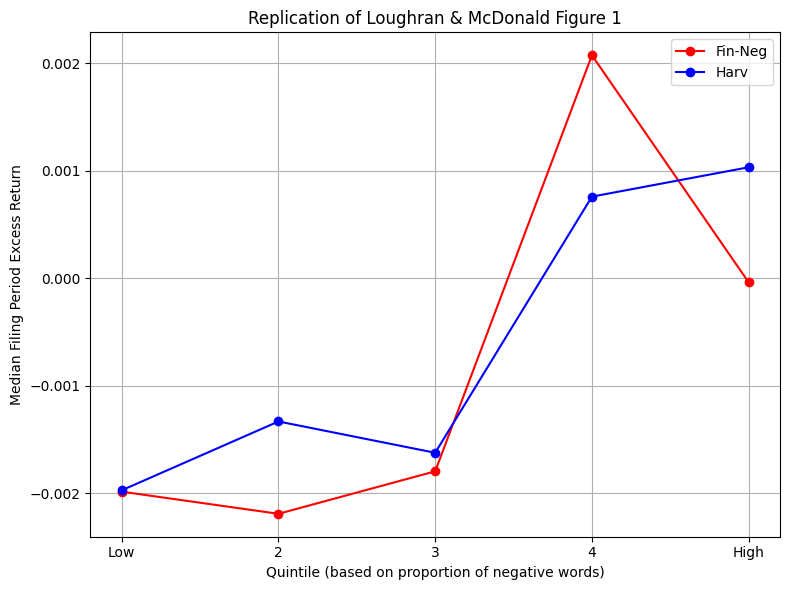

In [ ]:

plt.figure(figsize=(8, 6))

plt.plot(lm_grouped['quintile'], lm_grouped['cumulative_excess_return'], marker='o', color='red', label='Fin-Neg')
plt.plot(hvd_grouped['quintile'], hvd_grouped['cumulative_excess_return'], marker='o', color='blue', label='Harv')
plt.xticks(ticks=[1, 2, 3, 4, 5], labels=["Low", "2", "3", "4", "High"])
plt.xlabel('Quintile (based on proportion of negative words)')
plt.ylabel('Median Filing Period Excess Return')
plt.title('Replication of Loughran & McDonald Figure 1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()